##**1. Data Cleaning**

    IMPORTING THE RELEVANT LIBRARIES

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Importing the necessary functions and modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Importing the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# Misc
import random



DATA WINE

In [24]:
# Load Wine dataset and create a DataFrame
from sklearn.datasets import load_wine
wine_data = load_wine()
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target
wine_df


# Display the DataFrame only 6 first row (use head for the first 6 rows, and tail for the last 6 rows)
wine_df.head(6)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0


In [25]:
# Display the missing values in the DataFrame
wine_df.isnull().sum()


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [26]:
# Display the data types of the columns in the DataFrame
wine_df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int32
dtype: object

In [27]:
# Display data description
wine_df.describe(include='all')


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [28]:
# Display the values of the new DataFrame
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [29]:
# Drop columns that are not needed
#wine_df_new = df.drop(['Data_points',
 #                   'Sample Code', 
  #                  'Mean Radius',],
  #                  axis=1)

wine_df_new = wine_df

In [30]:
# Display the values of the new DataFrame
#df_new.head()

In [31]:
# Display data information
#df_new.info()

##**2. Data Correlation**

In [32]:
# Display the number of unique values in the DataFrame
wine_df_new.nunique()

alcohol                         126
malic_acid                      133
ash                              79
alcalinity_of_ash                63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
od280/od315_of_diluted_wines    122
proline                         121
target                            3
dtype: int64

In [33]:
# Display data correlation
wine_df_new.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


Seed

In [34]:
seed = 42

random.seed(seed)

Dropping the target

In [35]:
X = wine_df_new.drop('target', axis=1)
y = wine_df_new['target']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

Standard Scaling

In [ ]:
preprocessor = Pipeline(steps=[('step1', StandardScaler())])
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

##**3. Classification Algorithms**

RANDOM FOREST CLASSIFIER

Random Forest Classifier Performance:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



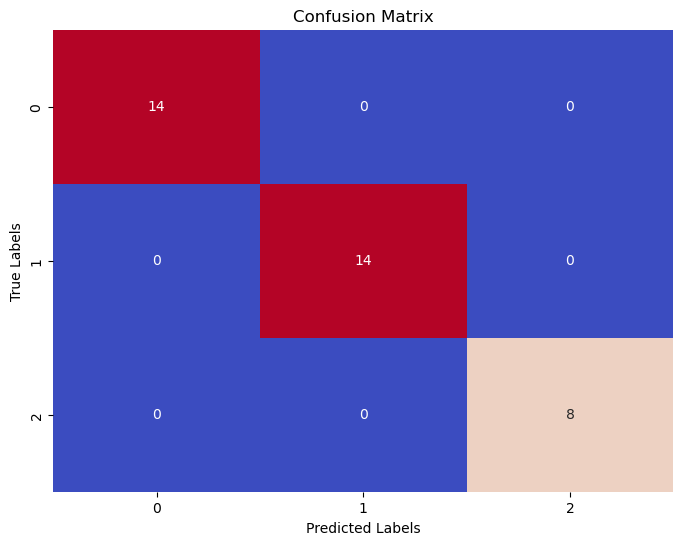

In [36]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Creating the pipeline
rf_pipeline = make_pipeline(StandardScaler(), rf_model)

# Training the model
rf_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_pipeline.predict(X_test)

# Calculating performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Displaying the results
print(f"Random Forest Classifier Performance:\nAccuracy: {accuracy_rf:.2f}\nClassification Report:\n{report_rf}")

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


SUPPORT VECTOR MACHINE (SVM) CLASSIFIER

Support Vector Machine (SVM) Classifier Performance:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



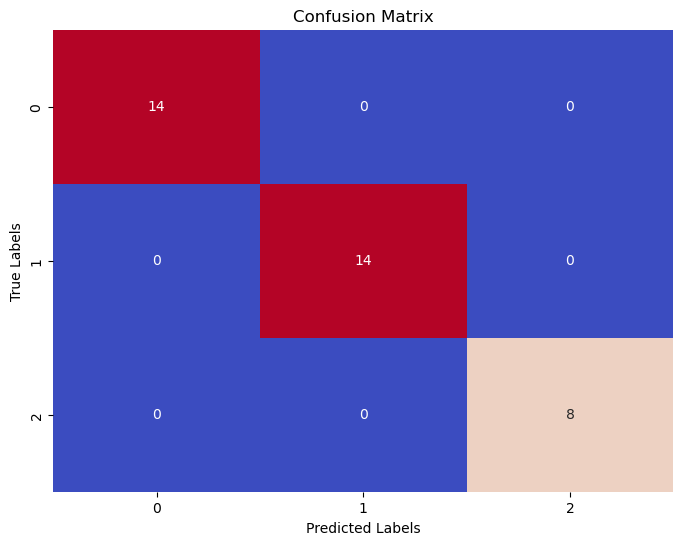

In [37]:
# Support Vector Machine (SVM) Classifier
svm_model = SVC(random_state=42)

# Creating the pipeline
svm_pipeline = make_pipeline(StandardScaler(), svm_model)

# Training the model
svm_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_svm = svm_pipeline.predict(X_test)

# Calculating performance metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Displaying the results
print(f"Support Vector Machine (SVM) Classifier Performance:\nAccuracy: {accuracy_svm:.2f}\nClassification Report:\n{report_svm}")

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


K-NEAREST NEIGHBORS (KNN) CLASSIFIER

K-Nearest Neighbors (KNN) Classifier Performance:
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



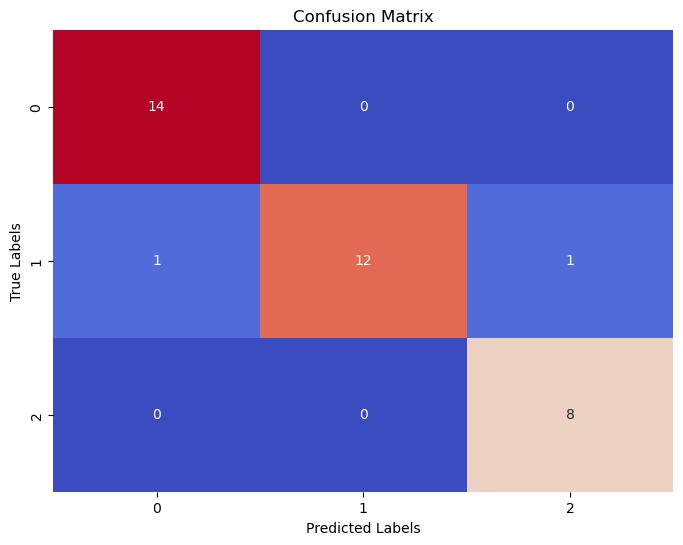

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNeighborsClassifier object
knn = KNeighborsClassifier()

# Create the pipeline
knn_pipeline = make_pipeline(StandardScaler(), knn)

# Train the model
knn_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_pipeline.predict(X_test)

# Calculate performance metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Display the results
print(f"K-Nearest Neighbors (KNN) Classifier Performance:\nAccuracy: {accuracy_knn:.2f}\nClassification Report:\n{report_knn}")

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

LOGISTIC REGRESSION CLASSIFIER

Logistic Regression Performance:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



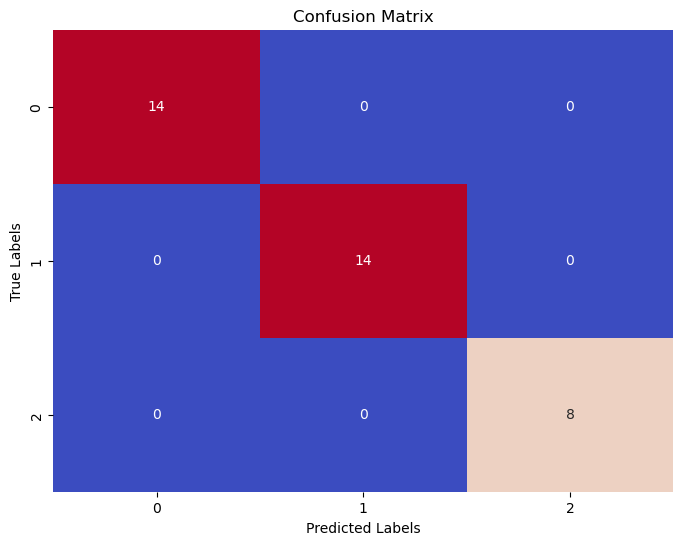

In [39]:
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression classifier
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Create a pipeline
logreg_pipeline = make_pipeline(StandardScaler(), logreg)

# Train the model
logreg_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_pipeline.predict(X_test)

# Calculate performance metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Display the results
print(f"Logistic Regression Performance:\nAccuracy: {accuracy_logreg:.2f}\nClassification Report:\n{report_logreg}")

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



DECISION TREE CLASSIFIER

Decision Tree Classifier Performance:
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



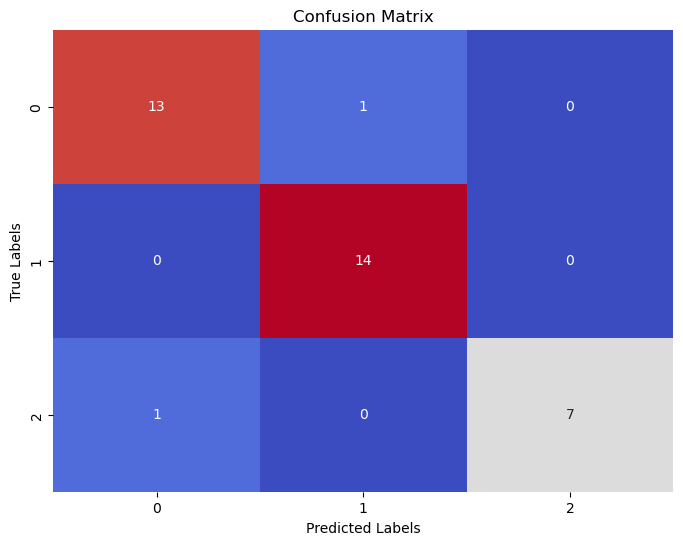

In [40]:

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Creating the pipeline
dt_pipeline = make_pipeline(StandardScaler(), dt_model)

# Training the model
dt_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_dt = dt_pipeline.predict(X_test)

# Calculating performance metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Displaying the results
print(f"Decision Tree Classifier Performance:\nAccuracy: {accuracy_dt:.2f}\nClassification Report:\n{report_dt}")

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


LIBRARY OF CLASSIFIERS

In [41]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

# Dictionary to store the models and their names
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'SGD Classifier': SGDClassifier(random_state=42)
}

# Splitting the dataset into training and testing sets
X = wine_df_new.drop('target', axis=1)
y = wine_df_new['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store the performance metrics
performance_metrics = {}

# Training and evaluating the models
for name, model in models.items():
    # Making pipelines for standardization and model training
    pipeline = make_pipeline(StandardScaler(), model)

    # Training the model
    pipeline.fit(X_train, y_train)

    # Making predictions
    y_pred = pipeline.predict(X_test)

    # Calculating performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Storing the metrics
    performance_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    }

# Converting performance metrics to a DataFrame for better visualization
performance_df = pd.DataFrame(performance_metrics).T

# Displaying the performance metrics
performance_df.sort_values(by='Accuracy', ascending=False)

,Accuracy,Precision,Recall,F1 Score
Random Forest,1.000000,1.000000,1.000000,1.000000
Gaussian Naive Bayes,1.000000,1.000000,1.000000,1.000000
Linear Discriminant Analysis,1.000000,1.000000,1.000000,1.000000
Support Vector Machine,0.981481,0.982323,0.981481,0.981354
Logistic Regression,0.981481,0.982716,0.981481,0.981575
SGD Classifier,0.981481,0.982407,0.981481,0.981493
Decision Tree,0.962963,0.963805,0.962963,0.962835
K-Nearest Neighbors,0.962963,0.965123,0.962963,0.962594
AdaBoost,0.925926,0.931683,0.925926,0.924514
Gradient Boosting,0.907407,0.914983,0.907407,0.906107


TRIAL PCA + ML ALGORITHMS

In [42]:
from sklearn.decomposition import PCA

# Splitting the dataset into training and testing sets
X = wine_df_new.drop('target', axis=1)
y = wine_df_new['target']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store the performance metrics
performance_metrics = {}

# Training and evaluating the models
for name, model in models.items():
    # Making pipelines for standardization, PCA, and model training
    pipeline2 = make_pipeline(StandardScaler(), PCA(n_components=10), model)

    # Training the model
    pipeline2.fit(X_train_pca, y_train_pca)

    # Making predictions
    y_pred_pca = pipeline2.predict(X_test_pca)

    # Calculating performance metrics
    accuracy = accuracy_score(y_test_pca, y_pred_pca)
    report = classification_report(y_test_pca, y_pred_pca, output_dict=True)

    # Storing the metrics
    performance_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    }

# Converting performance metrics to a DataFrame for better visualization
performance_df2 = pd.DataFrame(performance_metrics).T

# Displaying the performance metrics
performance_df2.sort_values(by='Accuracy', ascending=False)

,Accuracy,Precision,Recall,F1 Score
Gaussian Naive Bayes,1.000000,1.000000,1.000000,1.000000
Linear Discriminant Analysis,1.000000,1.000000,1.000000,1.000000
Support Vector Machine,0.981481,0.982323,0.981481,0.981354
Logistic Regression,0.981481,0.982716,0.981481,0.981575
Decision Tree,0.962963,0.964198,0.962963,0.963032
K-Nearest Neighbors,0.962963,0.965123,0.962963,0.962594
SGD Classifier,0.962963,0.966490,0.962963,0.963320
Random Forest,0.944444,0.947363,0.944444,0.944381
AdaBoost,0.907407,0.907666,0.907407,0.907025
Gradient Boosting,0.870370,0.878341,0.870370,0.871605


PCA Scatter Plot for each model

1. Logistic Regression Model

C:\Users\pingk\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


InvalidIndexError: (array([ True,  True, False,  True, False,  True, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False,  True,  True,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False,  True, False,  True,  True, False]), 0)

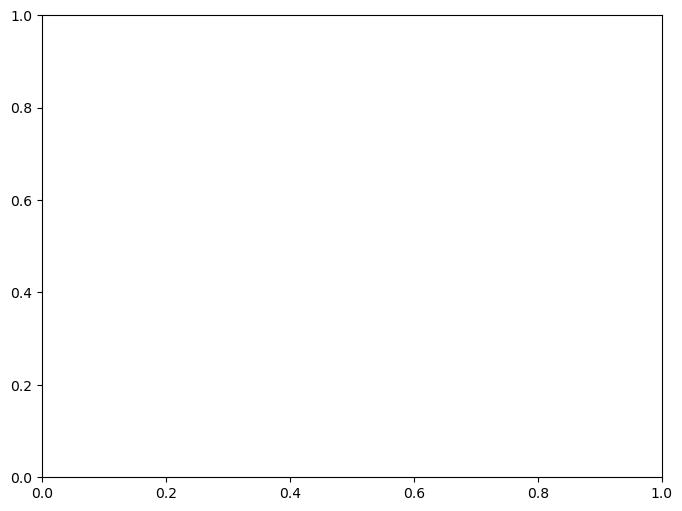

In [43]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Train the model
model = LogisticRegression()
model.fit(X_train_pca, y_train_pca)

# Make predictions
y_pred = model.predict(X_test_pca)

# Plot the predictions
fig, ax = plt.subplots(figsize=(8, 6))

# Define a color map
cmap = plt.get_cmap('viridis')

# Plot each class separately with a label and a circle
classes = np.unique(y_pred)
for class_value in classes:
    x_values = X_test_pca[y_pred == class_value, 0]
    y_values = X_test_pca[y_pred == class_value, 1]
    
    # Get the color from the color map
    color = cmap(class_value / len(classes))
    
    plt.scatter(x_values, y_values, color=color, label='Class ' + str(class_value))
    
    # Calculate the center and radius of the circle
    center = (np.mean(x_values), np.mean(y_values))
    radius = np.max(np.sqrt((x_values - center[0])**2 + (y_values - center[1])**2))
    
    # Add a circle with the same color as the scatter plot
    circle = plt.Circle(center, radius, color=color, fill=False)
    ax.add_artist(circle)

# Get the indices where the boolean array is True
indices = np.where(y_pred)[0]

# Select the corresponding values from X_test_pca
x_values = X_test_pca[indices, 0]
y_values = X_test_pca[indices, 1]


2. Decision Tree Model


InvalidIndexError: (array([ True,  True, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False,  True,  True,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False,  True, False,  True,  True, False]), 0)

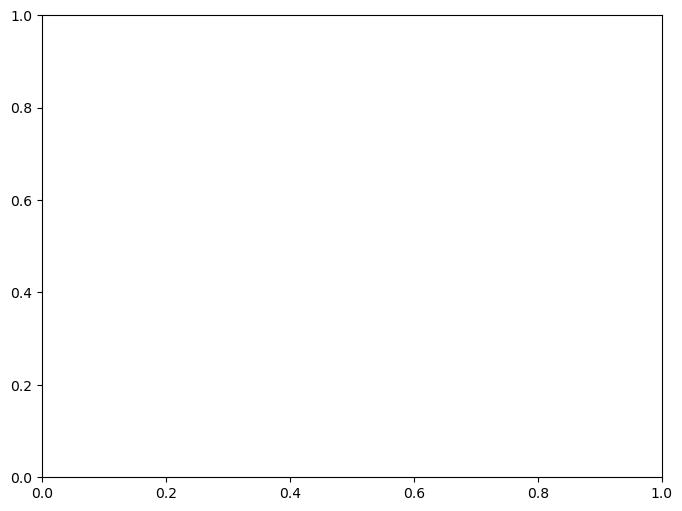

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Plot the predictions
fig, ax = plt.subplots(figsize=(8, 6))

# Define a color map
cmap = plt.get_cmap('viridis')

# Plot each class separately with a label and a circle
classes = np.unique(y_pred)
for class_value in classes:
    x_values = X_test_pca[y_pred == class_value, 0]
    y_values = X_test_pca[y_pred == class_value, 1]
    
    # Get the color from the color map
    color = cmap(class_value / len(classes))
    
    plt.scatter(x_values, y_values, color=color, label='Class ' + str(class_value))
    
    # Calculate the center and radius of the circle
    center = (np.mean(x_values), np.mean(y_values))
    radius = np.max(np.sqrt((x_values - center[0])**2 + (y_values - center[1])**2))
    
    # Add a circle with the same color as the scatter plot
    circle = plt.Circle(center, radius, color=color, fill=False)
    ax.add_artist(circle)

plt.title('Decision Tree')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a legend
plt.legend()

plt.show()

3. Random Forest Model


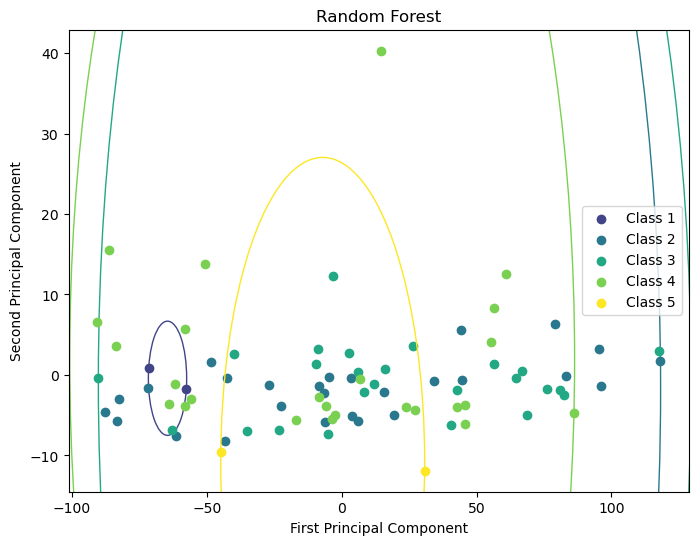

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Train the model
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Plot the predictions
fig, ax = plt.subplots(figsize=(8, 6))

# Define a color map
cmap = plt.get_cmap('viridis')

# Plot each class separately with a label and a circle
classes = np.unique(y_pred)
for class_value in classes:
    x_values = X_test_pca[y_pred == class_value, 0]
    y_values = X_test_pca[y_pred == class_value, 1]
    
    # Get the color from the color map
    color = cmap(class_value / len(classes))
    
    plt.scatter(x_values, y_values, color=color, label='Class ' + str(class_value))
    
    # Calculate the center and radius of the circle
    center = (np.mean(x_values), np.mean(y_values))
    radius = np.max(np.sqrt((x_values - center[0])**2 + (y_values - center[1])**2))
    
    # Add a circle with the same color as the scatter plot
    circle = plt.Circle(center, radius, color=color, fill=False)
    ax.add_artist(circle)

plt.title('Random Forest')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a legend
plt.legend()

plt.show()

Support Vector Machine (SVM) Model

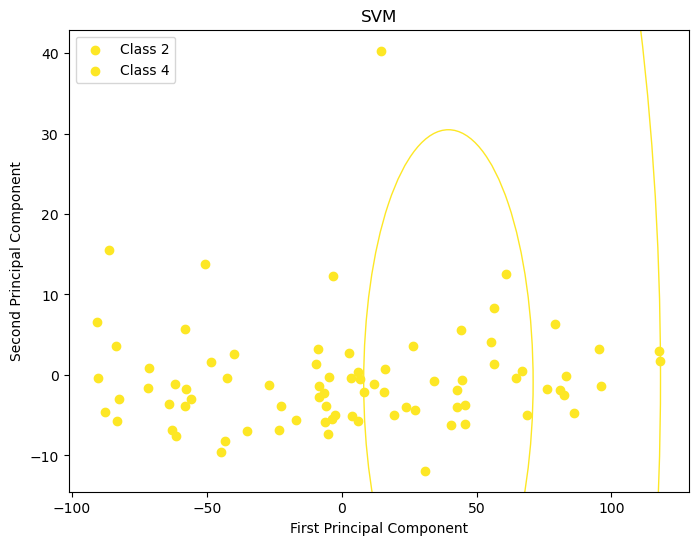

In [ ]:
from sklearn.svm import SVC

# Train the model
model = SVC()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Plot the predictions
fig, ax = plt.subplots(figsize=(8, 6))

# Define a color map
cmap = plt.get_cmap('viridis')

# Plot each class separately with a label and a circle
classes = np.unique(y_pred)
for class_value in classes:
    x_values = X_test_pca[y_pred == class_value, 0]
    y_values = X_test_pca[y_pred == class_value, 1]
    
    # Get the color from the color map
    color = cmap(class_value / len(classes))
    
    plt.scatter(x_values, y_values, color=color, label='Class ' + str(class_value))
    
    # Calculate the center and radius of the circle
    center = (np.mean(x_values), np.mean(y_values))
    radius = np.max(np.sqrt((x_values - center[0])**2 + (y_values - center[1])**2))
    
    # Add a circle with the same color as the scatter plot
    circle = plt.Circle(center, radius, color=color, fill=False)
    ax.add_artist(circle)

plt.title('SVM')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a legend
plt.legend()

plt.show()

Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the model
model = GradientBoostingClassifier()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Plot the predictions
fig, ax = plt.subplots(figsize=(8, 6))

# Define a color map
cmap = plt.get_cmap('viridis')

# Plot each class separately with a label and a circle
classes = np.unique(y_pred)
for class_value in classes:
    x_values = X_test_pca[y_pred == class_value, 0]
    y_values = X_test_pca[y_pred == class_value, 1]
    
    # Get the color from the color map
    color = cmap(class_value / len(classes))
    
    plt.scatter(x_values, y_values, color=color, label='Class ' + str(class_value))
    
    # Calculate the center and radius of the circle
    center = (np.mean(x_values), np.mean(y_values))
    radius = np.max(np.sqrt((x_values - center[0])**2 + (y_values - center[1])**2))
    
    # Add a circle with the same color as the scatter plot
    circle = plt.Circle(center, radius, color=color, fill=False)
    ax.add_artist(circle)

plt.title('Gradient Boosting')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a legend
plt.legend()

plt.show()

SGD Classifier Model

In [ ]:
from sklearn.linear_model import SGDClassifier

# Train the model
model = SGDClassifier()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Plot the predictions
fig, ax = plt.subplots(figsize=(8, 6))

# Define a color map
cmap = plt.get_cmap('viridis')

# Plot each class separately with a label and a circle
classes = np.unique(y_pred)
for class_value in classes:
    x_values = X_test_pca[y_pred == class_value, 0]
    y_values = X_test_pca[y_pred == class_value, 1]
    
    # Get the color from the color map
    color = cmap(class_value / len(classes))
    
    plt.scatter(x_values, y_values, color=color, label='Class ' + str(class_value))
    
    # Calculate the center and radius of the circle
    center = (np.mean(x_values), np.mean(y_values))
    radius = np.max(np.sqrt((x_values - center[0])**2 + (y_values - center[1])**2))
    
    # Add a circle with the same color as the scatter plot
    circle = plt.Circle(center, radius, color=color, fill=False)
    ax.add_artist(circle)

plt.title('SGD Classifier')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a legend
plt.legend()

plt.show()

Gaussian NB Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train the model
model = GaussianNB()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Plot the predictions
fig, ax = plt.subplots(figsize=(8, 6))

# Define a color map
cmap = plt.get_cmap('viridis')

# Plot each class separately with a label and a circle
classes = np.unique(y_pred)
for class_value in classes:
    x_values = X_test_pca[y_pred == class_value, 0]
    y_values = X_test_pca[y_pred == class_value, 1]
    
    # Get the color from the color map
    color = cmap(class_value / len(classes))
    
    plt.scatter(x_values, y_values, color=color, label='Class ' + str(class_value))
    
    # Calculate the center and radius of the circle
    center = (np.mean(x_values), np.mean(y_values))
    radius = np.max(np.sqrt((x_values - center[0])**2 + (y_values - center[1])**2))
    
    # Add a circle with the same color as the scatter plot
    circle = plt.Circle(center, radius, color=color, fill=False)
    ax.add_artist(circle)

plt.title('Gaussian NB')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a legend
plt.legend()

plt.show()

AdaBoost Model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Train the model
model = AdaBoostClassifier()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Plot the predictions
fig, ax = plt.subplots(figsize=(8, 6))

# Define a color map
cmap = plt.get_cmap('viridis')

# Plot each class separately with a label and a circle
classes = np.unique(y_pred)
for class_value in classes:
    x_values = X_test_pca[y_pred == class_value, 0]
    y_values = X_test_pca[y_pred == class_value, 1]
    
    # Get the color from the color map
    color = cmap(class_value / len(classes))
    
    plt.scatter(x_values, y_values, color=color, label='Class ' + str(class_value))
    
    # Calculate the center and radius of the circle
    center = (np.mean(x_values), np.mean(y_values))
    radius = np.max(np.sqrt((x_values - center[0])**2 + (y_values - center[1])**2))
    
    # Add a circle with the same color as the scatter plot
    circle = plt.Circle(center, radius, color=color, fill=False)
    ax.add_artist(circle)

plt.title('AdaBoost')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a legend
plt.legend()

plt.show()

K-Nearest Neighbors (KNN) Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train the model
model = KNeighborsClassifier()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Plot the predictions
fig, ax = plt.subplots(figsize=(8, 6))

# Define a color map
cmap = plt.get_cmap('viridis')

# Plot each class separately with a label and a circle
classes = np.unique(y_pred)
for class_value in classes:
    x_values = X_test_pca[y_pred == class_value, 0]
    y_values = X_test_pca[y_pred == class_value, 1]
    
    # Get the color from the color map
    color = cmap(class_value / len(classes))
    
    plt.scatter(x_values, y_values, color=color, label='Class ' + str(class_value))
    
    # Calculate the center and radius of the circle
    center = (np.mean(x_values), np.mean(y_values))
    radius = np.max(np.sqrt((x_values - center[0])**2 + (y_values - center[1])**2))
    
    # Add a circle with the same color as the scatter plot
    circle = plt.Circle(center, radius, color=color, fill=False)
    ax.add_artist(circle)

plt.title('K-Nearest Neighbors')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add a legend
plt.legend()

plt.show()

TRIAL OF Orthogonal partial least squares-discriminant analysis (OPLS-DA)

Defaulting to user installation because normal site-packages is not writeable
R^2Y(cum): 0.322297924131809
Q^2(cum): 0.1888749188186687


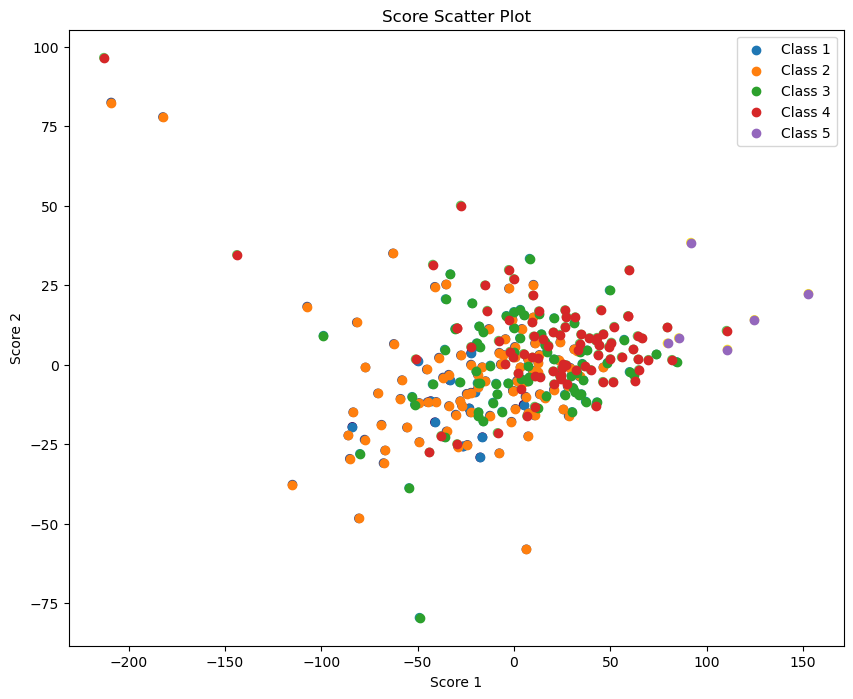

In [ ]:
!pip install pyopls

from pyopls import OPLS
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and y are your data
X = df_new.drop('RG_yuni_mix', axis=1)
y = df_new['RG_yuni_mix']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Create an OPLS model with one predictive component and one orthogonal component
opls = OPLS(1)

# Remove the orthogonal signal
X_opls = opls.fit_transform(X_scaled, y_scaled)

# Now, you can use the filtered data in any classifier, for example, PLSRegression
pls2 = PLSRegression(n_components=2)
pls2.fit(X_opls, y_scaled)

# Predict the response variable
y_pred = pls2.predict(X_opls)

# Calculate R^2Y
R2Y = r2_score(y_scaled, y_pred)


# Calculate Q^2 using cross-validation
y_cv = cross_val_predict(pls2, X_opls, y_scaled, cv=10)
Q2 = r2_score(y_scaled, y_cv)

# Print the results
print(f"R^2Y(cum): {R2Y}")
print(f"Q^2(cum): {Q2}")

# Get the unique class labels in your data
classes = np.unique(y)

# Plot the scores
plt.figure(figsize=(10, 8))
plt.scatter(pls2.x_scores_[:, 0], pls2.x_scores_[:, 1], c=y)

# Assuming 'classes' is a list of unique class labels in your data
for i, class_label in enumerate(classes):
    plt.scatter(pls2.x_scores_[y == class_label, 0], pls2.x_scores_[y == class_label, 1], label=f'Class {class_label}')


plt.xlabel('Score 1')
plt.ylabel('Score 2')
plt.title('Score Scatter Plot')
plt.legend()  # Add a legend instead of a colorbar
plt.show()

Hierarchical Cluster Analysis (HCA) on the OPLS-DA scores

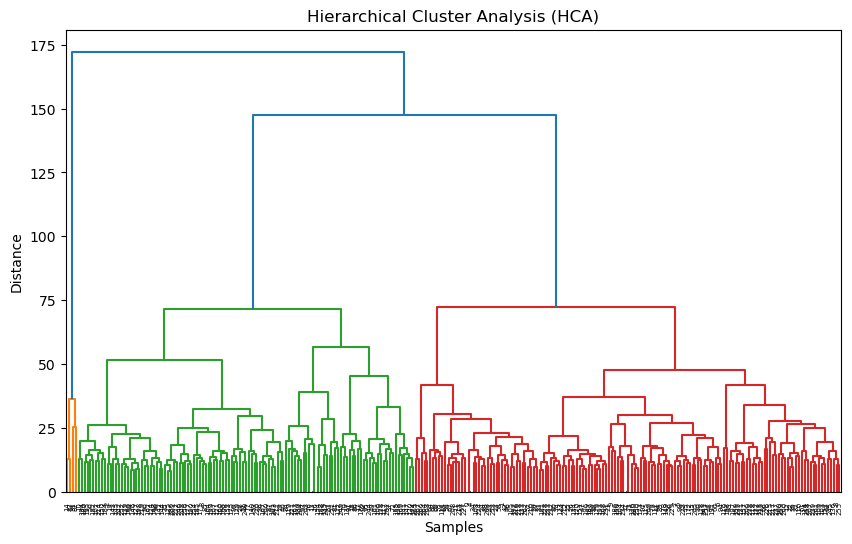

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(X_opls, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Cluster Analysis (HCA)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
